# CLUSTERING

### Importamos las librerias

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


### Leemos los datos

In [2]:
filename = "nasa/event/event_wind_summary/event_wind_summary.csv"
fd = pd.read_csv(filename);
fd.head()

,ARCHIVED_RECORD_NUMBER,SEISMIC_TIME_SOLS,ORIGINAL_FILE_NUMBER,ORIGINAL_RECORD_NUMBER,DATA_ACQUISITION_SOL,DATA_ACQUISITION_HOUR,DATA_ACQUSITION_MINUTE,DATA_ACQUISITION_SECOND,MEDIAN_X_AXIS,FIRST_X_AXIS,...,RMS_Z_AXIS_X100,MEAN_X_AXIS_CROSSINGS,MEAN_Y_AXIS_CROSSINGS,MEAN_Z_AXIS_CROSSINGS,METEO_TIME_SOLS,WINDSPEED,PRESSURE,WIND_DIRECTION,AIR_TEMPERATURE,WIND_SEISMIC_INTERVAL
0,1.0,101,126.0,0.0,12.0,34.0,16.0,26.0,2.0,2.0,...,105.0,15.0,5.0,18.0,0.5098,0.97,3.782,39.3,96.2,45256.0
1,2.0,101,154.0,0.0,12.0,34.0,43.0,51.0,1.0,2.0,...,103.0,19.0,7.0,20.0,0.5101,0.97,3.784,39.4,96.2,45283.0
2,3.0,101,207.0,0.0,12.0,35.0,35.0,51.0,1.0,1.0,...,113.0,25.0,9.0,24.0,0.5107,0.97,3.789,39.4,96.3,45335.0
3,4.0,101,260.0,0.0,12.0,36.0,26.0,51.0,1.0,1.0,...,111.0,18.0,12.0,27.0,0.5112,0.97,3.793,39.4,96.4,45386.0
4,5.0,101,313.0,0.0,12.0,37.0,18.0,51.0,1.0,2.0,...,108.0,5.0,14.0,29.0,0.5118,0.97,3.797,39.5,96.6,45438.0


# CLUSTERING CON DATOS CON MUY POCA INFLUENCIA DEL VIENTO

## ELECCION DE DATOS

In [5]:
# Debido a que SEISMIC_TIME_SOLS declara el tiempo segun el dia, las horas y los segundos, usaremos unicamente este valor 
# como medidor de tiempo

In [22]:
# Vemos que elementos usar en funcion de la correlacion anterior

datos_pca = fd[['SEISMIC_TIME_SOLS','DATA_ACQUISITION_SOL', 'DATA_ACQUISITION_HOUR','WINDSPEED','PRESSURE','WIND_DIRECTION','AIR_TEMPERATURE','MAXIMUM_X_AXIS']]
datos_pca_less = datos_pca[datos_pca.WINDSPEED <= 4 ]
datos_pca_limpios = datos_pca_less[~np.isnan(datos_pca_less).any(axis=1)]

# Estandarizamos los datos 

datos_std = StandardScaler().fit_transform(datos_pca_limpios)

# Volvemos a generar el DataFrame para mejor manejo

datos_pca_std = pd.DataFrame(datos_std, columns=datos_pca.columns)
datos_pca_std.describe()

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,SEISMIC_TIME_SOLS,DATA_ACQUISITION_SOL,DATA_ACQUISITION_HOUR,WINDSPEED,PRESSURE,WIND_DIRECTION,AIR_TEMPERATURE,MAXIMUM_X_AXIS
count,1.888240e+05,1.888240e+05,1.888240e+05,1.888240e+05,1.888240e+05,1.888240e+05,1.888240e+05,1.888240e+05
mean,-1.425085e-13,-6.953978e-14,-2.377304e-16,6.307977e-15,2.287460e-13,5.265351e-16,4.541177e-15,-1.973096e-13
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.691701e+00,-1.131798e+00,-1.688788e+00,-2.200066e+00,-8.206834e+00,-1.375896e+00,-6.229314e+00,-6.190386e-01
25%,-7.159115e-01,-9.110490e-01,-8.749233e-01,-8.139223e-01,-1.116133e+00,-7.519074e-01,-7.037699e-01,-2.513958e-01
50%,1.998287e-02,-4.695502e-01,-2.925072e-03,-1.533381e-01,3.410141e-01,-3.440273e-01,-3.894358e-02,-2.513958e-01
75%,9.860469e-01,1.075696e+00,8.690732e-01,7.671481e-01,5.521947e-01,5.340344e-01,5.378263e-01,-1.594852e-01
max,1.381550e+00,1.517195e+00,1.741071e+00,2.131634e+00,2.353442e+00,2.128563e+00,2.558722e+00,1.105362e+01


Confirmamos que todas esas variables están de alguna forma correlacionadas

Ahora veremos que al estandarizar los valores, la matriz de correlación ha cambiado.

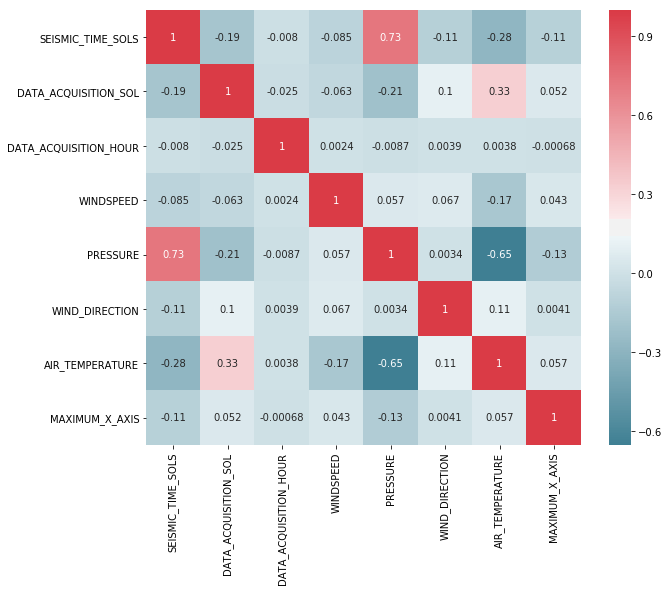

In [9]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = datos_pca_std.corr()
sns.heatmap(corr,square=True ,cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax , annot = True) 

Una vez tenemos ya los datos estandarizados, haremos uso de pca para reducir el número de variables.

Debido a que k-means solo puede representar valores en 2 y 3 dimensiones, tendremos que reducir de 6 componentes a 3.

## METODO PCA 

Aplicaremos el modelo para reducir las variables a tres comoponentes.
Una vez tenemos el modelo, aplicamos la transformación a nuestro dataset.


In [26]:
usados = ['SEISMIC_TIME_SOLS','WINDSPEED','PRESSURE','WIND_DIRECTION','AIR_TEMPERATURE','MAXIMUM_X_AXIS']

sklearn_pca = sklearnPCA(n_components=3)
datos_pca_3 = sklearn_pca.fit_transform(datos_pca_std[usados])
datos_pca_3

array([[ 2.52276126, -0.08943823,  1.65867817],
       [ 2.50791187, -0.11652757,  1.60084569],
       [ 2.50617815, -0.11744228,  1.59969619],
       ...,
       [-0.67636489, -1.78016572,  0.1682911 ],
       [-0.66301904, -1.75258965,  0.22519548],
       [-0.66301904, -1.75258965,  0.22519548]])

## METODO K-MEANS

Lo primero será intuir cual es la k a la hora de tomar k grupos.
Para ello usaremos la gráfica de punto de codo:

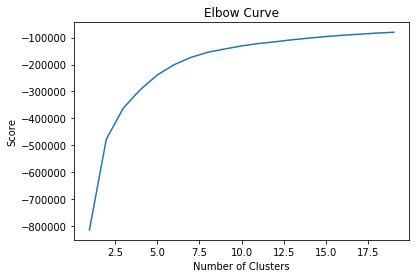

In [128]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(datos_pca_3).score(datos_pca_3) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Lo siguiente será ejecutar K-means y obtener los centroides y sus etiquetas:

In [27]:
kmeans = KMeans(n_clusters=5).fit(datos_pca_3)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.94320985 -0.89023071  0.13706177]
 [-0.99766056  0.97941694 -0.36238508]
 [ 1.55418978 -0.28159723  0.41471669]
 [ 2.54889187  0.36124677 -1.35357481]
 [ 1.49843404  1.89722736  3.41882189]]


Lo mostramos todo:

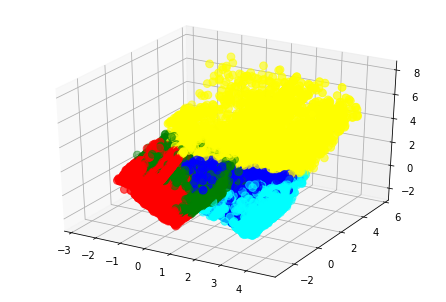

In [28]:
labels = kmeans.predict(datos_pca_3)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(datos_pca_3[:, 0], datos_pca_3[:, 1], datos_pca_3[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [29]:
copy =  pd.DataFrame()
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cantidad
label,
0,65817
1,57074
2,44271
3,16913
4,4749


## RELACIONAR PCA CON EL DATASET ORIGINAL

Lo primero será ver que tamaño tiene ambos datasets. Por ello: 

In [30]:
# Dataset original : fd
# Dataset con datos fisicos y temporales : datos_gen
# Dataset con datos pca limpios : datos_pca
# Dataset con datos pca estandarizados : datos_pca_std
# Dataset con datos pca reducidos a 3 columnas : datos_pca_3

In [31]:
datos_pca_std.shape

(188824, 8)

In [32]:
datos_pca_3.shape

(188824, 3)

Podemos ver entonces que a cada tupla de valores en datos_pca_std se le asigna un valor datos_pca_3.
Lo siguiente será juntar el dataset datos_pca_3 con su grupo establecido, por ello:

In [33]:
# Las estiquetas se guardan en : labels
labels

array([2, 2, 2, ..., 0, 0, 0])

In [34]:
labels.shape

(188824,)

In [37]:
datos_pca_less['LABEL'] = labels; 
datos_pca_less.describe()

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,SEISMIC_TIME_SOLS,DATA_ACQUISITION_SOL,DATA_ACQUISITION_HOUR,WINDSPEED,PRESSURE,WIND_DIRECTION,AIR_TEMPERATURE,MAXIMUM_X_AXIS,LABEL
count,188824.000000,188824.000000,188824.000000,188824.000000,188824.000000,188824.000000,188824.000000,188824.000000,188824.000000
mean,622.835921,10.254147,29.050317,2.031596,8.565484,141.340636,191.284514,6.735219,1.140485
std,308.468987,9.060070,17.201915,0.923427,0.805000,102.726536,22.712757,10.880157,1.071412
min,101.000000,0.000000,0.000000,0.000000,1.959000,0.000000,49.800000,0.000000,0.000000
25%,402.000000,2.000000,14.000000,1.280000,7.667000,64.100000,175.300000,4.000000,0.000000
50%,629.000000,6.000000,29.000000,1.890000,8.840000,106.000000,190.400000,4.000000,1.000000
75%,927.000000,20.000000,44.000000,2.740000,9.010000,196.200000,203.500000,5.000000,2.000000
max,1049.000000,24.000000,59.000000,4.000000,10.460000,360.000000,249.400000,127.000000,4.000000


In [ ]:
datos_pc